In [2]:
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [11]:
import dill
dill.load_session('600gen.db')

In [12]:
FT = np.empty(len(Gen_Selection))
n_sessions = 300
for i in range(len(Gen_Selection)):
    uniform_chromosome =  0.5 * np.ones(size * size)
    Uniform_Predator = Predator(size, uniform_chromosome)
        
    Games = [Game(Gen_Selection[i], Predator(size, uniform_chromosome)) for j in range (n_sessions)]
       
    FT[i] = fitness_prey(Games)

<IPython.core.display.Javascript object>


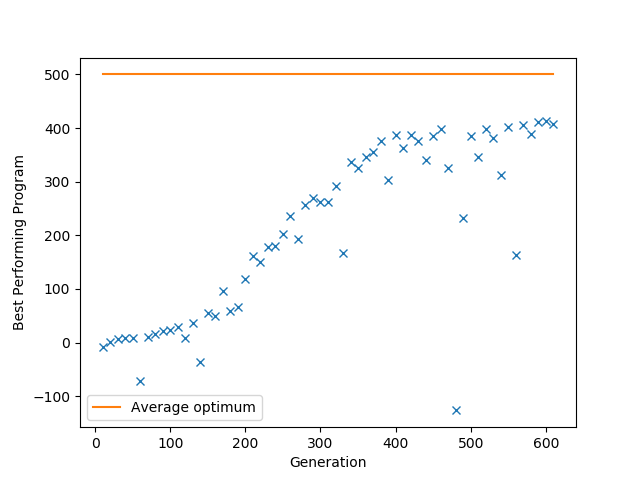

In [13]:
import matplotlib.pyplot as plt
%matplotlib notebook
x = np.arange(1,len(Gen_Selection),1)
plt.plot(x * 10, FT[1:] - 1000, 'x')
plt.plot(x * 10, [500 for y in x], label = "Average optimum")
plt.xlabel("Generation")
plt.ylabel("Best Performing Program")
plt.legend()


In [14]:
x = np.linspace(0, size - 1, size)
y = np.linspace(0, size - 1, size)

In [15]:
size = 10

In [16]:
chromosome = 0.5 * np.ones(size * size)

In [17]:
Deus0 = Gen_Selection[0]
Deus10 = Gen_Selection[1]
Deus20 = Gen_Selection[2]
Deus140 = Gen_Selection[14]
Deus250 = Gen_Selection[25]
Deus400 = Gen_Selection[40]
DeusFinal = Gen_Selection[len(Gen_Selection) - 1]

<IPython.core.display.Javascript object>


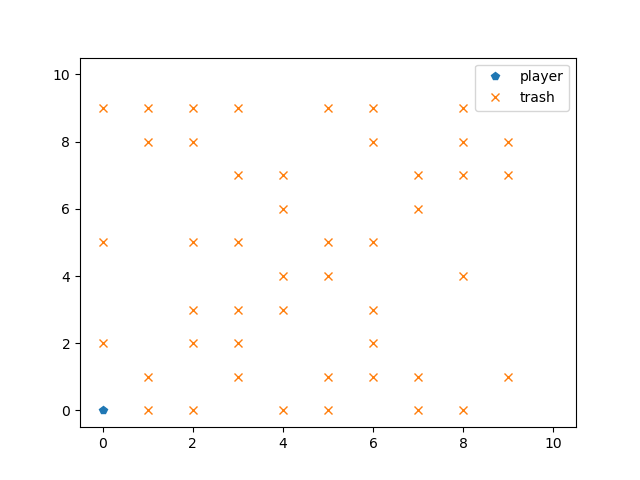

interactive(children=(IntSlider(value=0, description='c', max=199), Output()), _dom_classes=('widget-interact'…

In [18]:
Deus = DeusFinal
G = Game(Deus, Predator(size, chromosome))
n_steps = np.copy(G.steps_left)
Fields = [i for i in range (n_steps+1)]
positions = [i for i in range (n_steps+1)]

score = [i for i in range (n_steps+1)]

positions[0] = np.copy(G.pos)
Fields[0] = np.copy(G.predator.field)
score[0] = np.copy(G.current_reward)


i = 1
while(G.steps_left > 0):
    G.step(G.observe_decide())
    positions[i] = np.copy(G.pos)
    score[i] = np.copy(G.current_reward)
    
    
    Fields[i] = np.copy(G.predator.field)
    i += 1
    
FieldsB = [Fields[i].astype(bool) for i in range (n_steps)]


from ipywidgets import *


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
linep, = ax.plot([positions[0][0]], [positions[0][1]], marker = 'p', label = 'player', linestyle = '')
linef, = ax.plot(x, y, marker = 'x', label = 'trash', linestyle = '')
plt.legend()
def update(c = 0):
    
    k = np.int(c)
    print(k)
    print(c, positions[c])
    print(score[c])
    linep.set_xdata([positions[k][0]])
    linep.set_ydata([positions[k][1]])
    FD = FieldsB[c]
    datx = []
    daty = []
    
    for k in range(size):
        for j in range(size):
            if(FD[k][j] == 1):
                datx.append(k)
                daty.append(j)
                
    linef.set_xdata(datx)
    linef.set_ydata(daty)
    
    plt.ylim(top=size + 0.5)
    plt.ylim(bottom=-0.5)
    
    plt.xlim(right=size + 0.5)
    plt.xlim(left=- 0.5)
    
    fig.canvas.draw()

interact(update, c = widgets.IntSlider(min=0,max=n_steps - 1,step=1,value=0));